### PCA : Proteins

In [2]:
# Based on code provided by Dibakar Sigdel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
sns.set(font_scale=2.8)

### Data

In [3]:
data = pd.read_csv('../../result/caseolap.csv')
data = data.set_index('protein')
ndf = data
ndf.head()

,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
protein,,,,,,,,,,,,,,,,,,,
Q12931,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.021311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
P33121,0.0,0.0,0.007914,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.008891,0.000000,0.000000,0.006221,0.000000,0.0
O15527,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.007597,0.016587,0.003389,0.027385,0.000000,0.007199,0.000000,0.000000,0.0
Q9H3J6,0.0,0.0,0.000000,0.015593,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020543,0.0
P21796,0.0,0.0,0.000000,0.000000,0.006014,0.0,0.0,0.0,0.0,0.0,0.000000,0.015305,0.012427,0.026503,0.008245,0.009337,0.000000,0.005010,0.0


In [4]:
nonzero_dict = {}
for col in ndf.columns:
    nonzero = 0
    for i in range(0,len(ndf)):
        if(ndf[col][i] > 0):
            nonzero += 1
    nonzero_dict[col] = nonzero
print(nonzero_dict)

{'LHON': 71, 'MELAS': 73, 'ADOA': 45, 'Leigh': 163, 'MERRF': 40, 'KSS': 77, 'Alpers': 43, 'LBSL': 20, 'PDD': 42, 'PEO': 49, 'MS': 281, 'Parkin': 364, 'ALS': 244, 'AD': 433, 'Epil': 371, 'Schiz': 327, 'FA': 116, 'HSP': 78, 'WD': 79}


In [5]:
def feature_norm(df):
    dff = df.copy(deep =True)
    fchr =  ["LHON", "MELAS", "ADOA", "Leigh", "MERRF", "KSS", "Alpers", "LBSL", "PDD", "PEO", "MS", "Parkin", "ALS", "AD", "Epil", "Schiz", "FA", "HSP", "WD"]
    for t in fchr:
        dff[t] = (df[t]-df[t].min())/(df[t].max()-df[t].min())
    return dff
ndfn = feature_norm(ndf)
ndfn.head()

,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
protein,,,,,,,,,,,,,,,,,,,
Q12931,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.084090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
P33121,0.0,0.0,0.028256,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.080656,0.000000,0.000000,0.020215,0.000000,0.0
O15527,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.062617,0.065448,0.016559,0.248425,0.000000,0.039394,0.000000,0.000000,0.0
Q9H3J6,0.0,0.0,0.000000,0.160246,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109171,0.0
P21796,0.0,0.0,0.000000,0.000000,0.069158,0.0,0.0,0.0,0.0,0.0,0.000000,0.060390,0.060720,0.240416,0.047513,0.051094,0.000000,0.026623,0.0


### Add colors

In [6]:
tdata = ndf.copy(deep =True)

### PCA : Weights

In [15]:
def pca_results(good_data, pca,fname):
	#clc  =['navy','green','firebrick','mediumslateblue','darkgoldenrod', 'deepskyblue',"red","blue"]

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (22,10))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar' );
	ax.set_ylabel("Feature Weights",fontsize =20)
	ax.set_xticklabels(dimensions, rotation=0, fontsize = 8)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Var.\n %.4f"%(ev),fontsize =8)

	# Return a concatenated DataFrame
	plt.legend(fontsize =15)
	plt.savefig(fname)
	return pd.concat([variance_ratios, components], axis = 1)

In [16]:
wt_data = ndf.copy(deep =True)

In [17]:
wt_data.head()

,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
protein,,,,,,,,,,,,,,,,,,,
Q12931,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.021311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
P33121,0.0,0.0,0.007914,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.008891,0.000000,0.000000,0.006221,0.000000,0.0
O15527,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.007597,0.016587,0.003389,0.027385,0.000000,0.007199,0.000000,0.000000,0.0
Q9H3J6,0.0,0.0,0.000000,0.015593,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020543,0.0
P21796,0.0,0.0,0.000000,0.000000,0.006014,0.0,0.0,0.0,0.0,0.0,0.000000,0.015305,0.012427,0.026503,0.008245,0.009337,0.000000,0.005010,0.0


,Explained Variance,LHON,MELAS,ADOA,Leigh,MERRF,KSS,Alpers,LBSL,PDD,PEO,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
Dimension 1,0.2883,0.0368,0.0608,0.0288,0.0493,0.0465,0.0767,0.0564,0.0222,0.0300,0.0813,0.3077,0.5333,0.2771,0.4947,0.3460,0.3635,0.0725,0.0333,0.1171
Dimension 2,0.0985,-0.0481,-0.1675,-0.0750,-0.2404,-0.1552,-0.3037,-0.3091,-0.0466,-0.0019,-0.4695,-0.1287,0.5874,-0.0199,-0.1159,-0.2827,0.0325,-0.0994,-0.0724,-0.0170
Dimension 3,0.0818,0.0391,0.1617,0.1440,0.2312,0.1580,0.2639,0.1487,-0.0050,0.0498,0.4502,-0.2182,0.5219,-0.0607,-0.1069,-0.4124,-0.2648,0.0050,-0.0143,-0.0269
Dimension 4,0.0710,-0.0055,-0.0058,-0.0155,0.0722,-0.0074,-0.0401,-0.1592,-0.0295,0.5278,-0.0958,-0.0434,-0.0664,0.1764,0.0498,-0.0990,-0.1364,0.7765,-0.0616,0.0618
Dimension 5,0.0652,0.0156,0.0283,0.0400,0.1964,0.0450,0.0450,-0.2018,-0.0426,0.7502,-0.0044,-0.0796,-0.0765,0.0024,0.0408,0.0508,0.1196,-0.5591,-0.0756,-0.0172
Dimension 6,0.0609,-0.0850,-0.0846,-0.4030,-0.1748,-0.0971,-0.1024,0.6850,0.1540,0.3368,-0.0362,0.2309,0.1274,-0.0923,-0.2271,-0.0173,-0.0221,-0.0182,0.1853,-0.0025
Dimension 7,0.0551,0.0645,-0.0780,0.6975,-0.0579,-0.0840,-0.1660,0.2509,0.0809,0.0572,-0.2118,0.2051,-0.0790,0.2767,0.1490,-0.2013,-0.2906,-0.1314,0.2341,0.0600
Dimension 8,0.0507,0.0379,-0.0445,0.4878,-0.1415,-0.0594,-0.0206,0.0987,0.0037,0.1038,0.1053,-0.0864,0.0112,-0.3843,-0.2525,-0.0269,0.6550,0.2063,0.0395,-0.1006
Dimension 9,0.0464,-0.0070,-0.0595,0.2308,-0.2087,-0.0486,-0.0270,-0.0955,-0.0514,0.1007,0.1069,-0.0545,0.2311,-0.1914,-0.2525,0.7069,-0.4517,0.0340,-0.0131,-0.0369
Dimension 10,0.0382,-0.0154,0.0277,-0.1103,0.0368,0.0378,0.0404,-0.3074,-0.1264,0.0102,0.0771,0.0206,0.0204,0.0328,-0.1158,-0.0077,0.0410,0.0167,0.9205,-0.0357


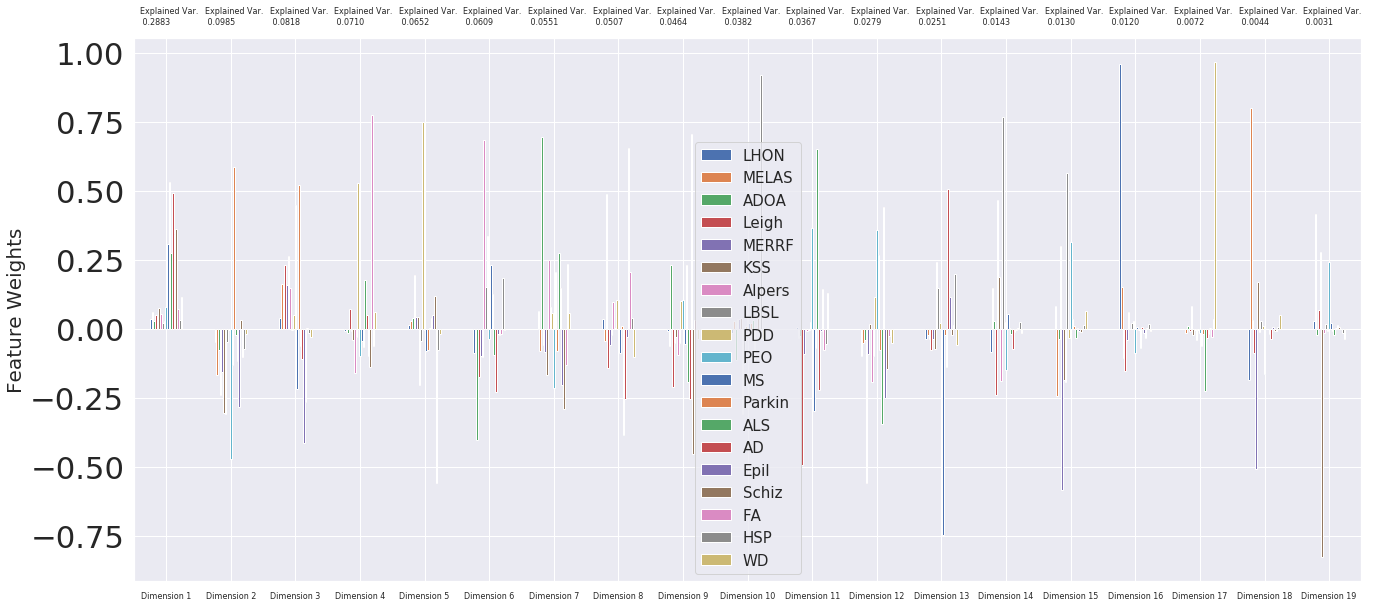

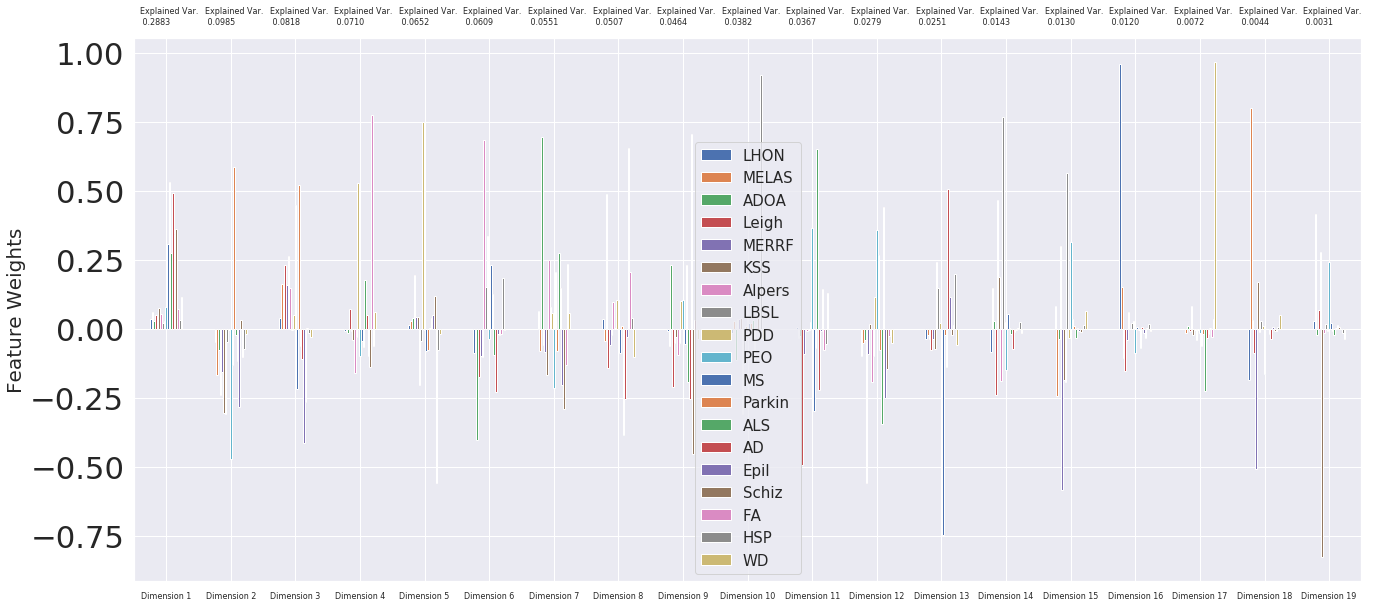

In [18]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()
pca.fit(wt_data)


# Generate PCA results plot
pca_results(wt_data, pca, fname = 'Data/pca-both-mito-weights.pdf')
pca_results(wt_data, pca, fname = 'Data/pca-both-mito-weights.png')

In [20]:
pca_results

<function __main__.pca_results>

In [21]:
pca.components_

array([[ 3.67925758e-02,  6.08136287e-02,  2.87536704e-02,
         4.92622694e-02,  4.64781318e-02,  7.66993479e-02,
         5.63942041e-02,  2.21658491e-02,  2.99749694e-02,
         8.13062564e-02,  3.07699616e-01,  5.33260298e-01,
         2.77068902e-01,  4.94684854e-01,  3.46038646e-01,
         3.63480261e-01,  7.25461728e-02,  3.33113231e-02,
         1.17096130e-01],
       [-4.81204365e-02, -1.67492408e-01, -7.50284278e-02,
        -2.40385525e-01, -1.55166022e-01, -3.03659638e-01,
        -3.09105527e-01, -4.66132560e-02, -1.92204464e-03,
        -4.69515907e-01, -1.28740906e-01,  5.87371532e-01,
        -1.98822953e-02, -1.15869933e-01, -2.82663993e-01,
         3.24558391e-02, -9.94263094e-02, -7.23624849e-02,
        -1.69634410e-02],
       [ 3.91405854e-02,  1.61685989e-01,  1.43958727e-01,
         2.31235617e-01,  1.58041679e-01,  2.63908759e-01,
         1.48670760e-01, -4.98649125e-03,  4.97653603e-02,
         4.50184063e-01, -2.18160166e-01,  5.21879488e-01,
    

----------

### PCA: Biplot

In [22]:
clrs = []
for row,col in tdata.T.iteritems():
    val = np.array(col)
    mx = max(val)
    for item in val:
        if  mx == col[0]:
            grp =  'navy'
        elif mx == col[1]:
            grp =  'orange'
        elif mx == col[2]:
            grp = 'green'
        elif mx == col[3]:
            grp = 'red'
        elif mx == col[4]:
            grp = 'purple'
        elif mx == col[5]:
            grp = 'brown'
        elif mx == col[6]:
            grp = "pink"
        elif mx == col[7]:
            grp = "grey"
        elif mx == col[8]:
            grp =  'orange'
        elif mx == col[9]:
            grp = 'green'
        elif mx == col[10]:
            grp = 'red'
        elif mx == col[11]:
            grp = 'purple'
        elif mx == col[12]:
            grp = 'brown'
        elif mx == col[13]:
            grp = "pink"
        elif mx == col[14]:
            grp = "grey"
        elif mx == col[15]:
            grp =  'orange'
        elif mx == col[16]:
            grp = 'green'
        elif mx == col[17]:
            grp = 'red'
        elif mx == col[18]:
            grp = 'purple'

    clrs.append(grp)

In [23]:
pdata = ndf.copy(deep = True)
ppdata = ndf.copy(deep = True)

In [24]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(pdata)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(ppdata)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [25]:
def biplot(good_data, reduced_data, pca,fname,clrs):
   

    fig, ax = plt.subplots(figsize = (25,15))
    clc  =['navy','orange','green','red','purple', 'brown',"pink","grey",'navy','orange','green','orange','purple', 'brown',"pink","grey",'pink','grey','navy']
    
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors = clrs, edgecolors= clrs, s=50, alpha=0.5)
    
    # Label the points: COMMENT OUT IF YOU WANT TO REMOVE THE ID LABELS
    #for i in range(0,len(reduced_data)):
    #    ax.annotate(wt_data.index.values[i], (reduced_data.loc[:, 'Dimension 1'][i],reduced_data.loc[:, 'Dimension 2'][i]), xytext=(5,5), textcoords='offset points')

    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    asize, tpos = 0.5, 0.5,
    

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        
        ax.arrow(0, 0, v[0]*asize, v[1]*asize,head_width=0.001, head_length=0.0005, linewidth=1, color= clc[i])
        ax.text(v[0]*tpos+ 0.01, v[1]*tpos, good_data.columns[i], color=clc[i], 
                 ha='center', va='center', fontsize=25)
        
    plt.axis([-0.1, 0.3, -0.3, 0.5])
    ax.set_xlabel("PC 1", fontsize=50)
    ax.set_ylabel("PC 2", fontsize=50)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.savefig(fname)
    return ax

In [26]:
def biplot_labeled_points(good_data, reduced_data, pca,fname,clrs):
   

    fig, ax = plt.subplots(figsize = (25,15))
    clc  =['navy','orange','green','red','purple', 'brown',"pink","grey",'navy','orange','green','orange','purple', 'brown',"pink","grey",'pink','grey','navy']
    
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors = clrs, edgecolors= clrs, s=50, alpha=0.5)
    
    # Label the points: COMMENT OUT IF YOU WANT TO REMOVE THE ID LABELS
    for i in range(0,len(reduced_data)):
        ax.annotate(wt_data.index.values[i], (reduced_data.loc[:, 'Dimension 1'][i],reduced_data.loc[:, 'Dimension 2'][i]), xytext=(5,5), fontsize = 14, textcoords='offset points')

    
    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    asize, tpos = 0.5, 0.5,
    

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        
        ax.arrow(0, 0, v[0]*asize, v[1]*asize,head_width=0.001, head_length=0.0005, linewidth=1, color= clc[i])
        ax.text(v[0]*tpos+ 0.01, v[1]*tpos, good_data.columns[i], color=clc[i], 
                 ha='center', va='center', fontsize=25)
        
    plt.axis([-0.1, 0.3, -0.3, 0.5])
    ax.set_xlabel("PC 1", fontsize=50)
    ax.set_ylabel("PC 2", fontsize=50)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.savefig(fname)
    return ax

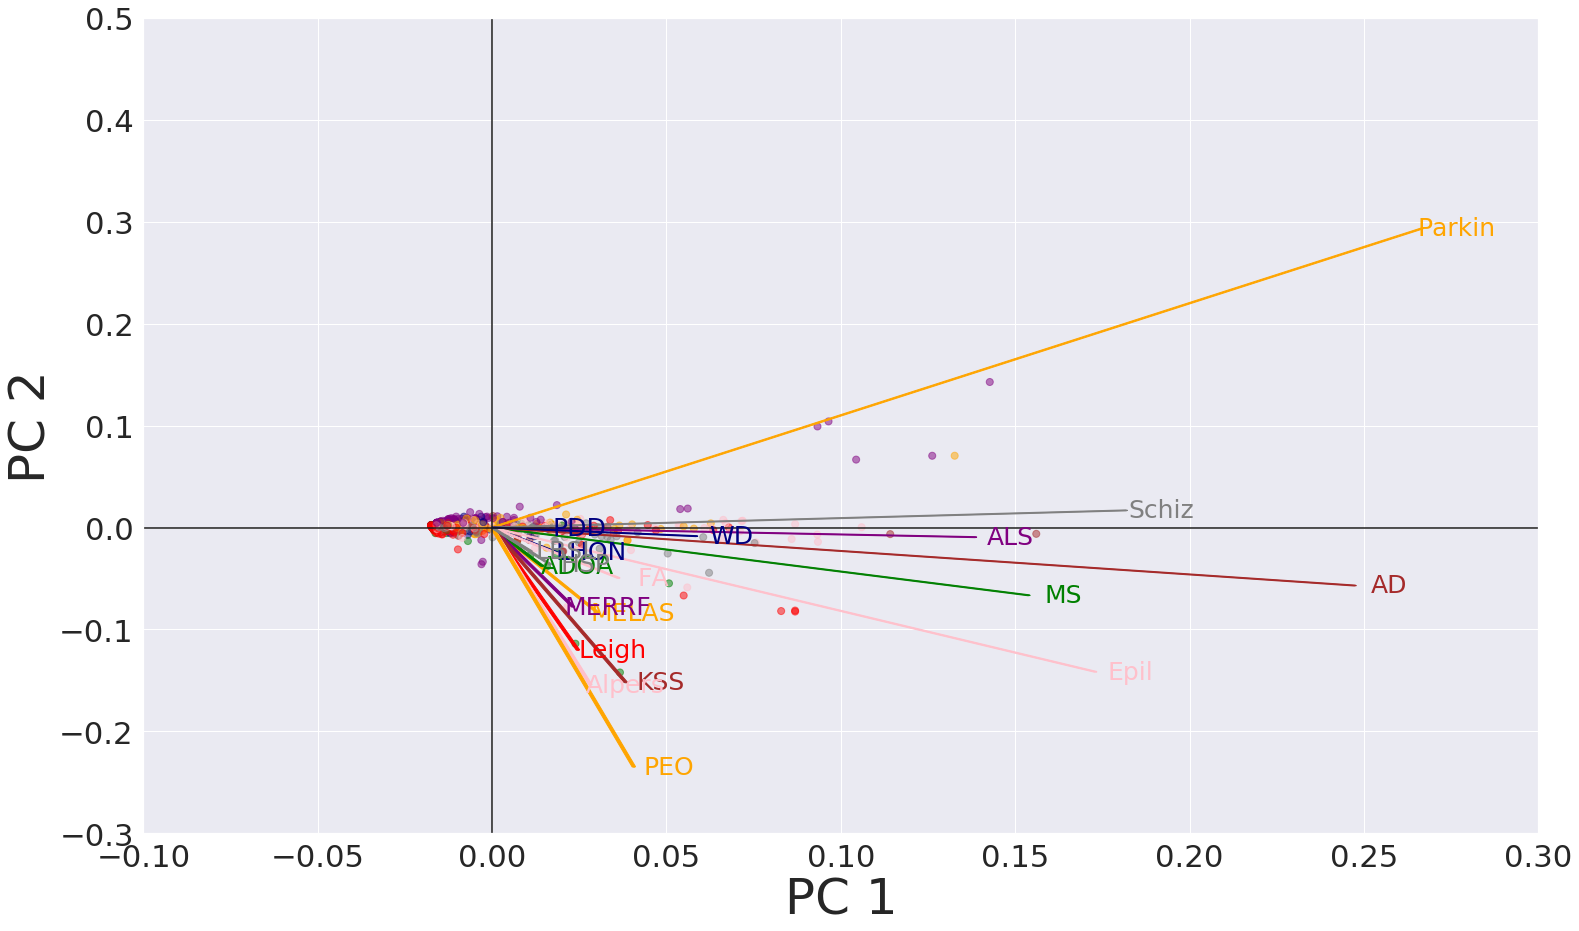

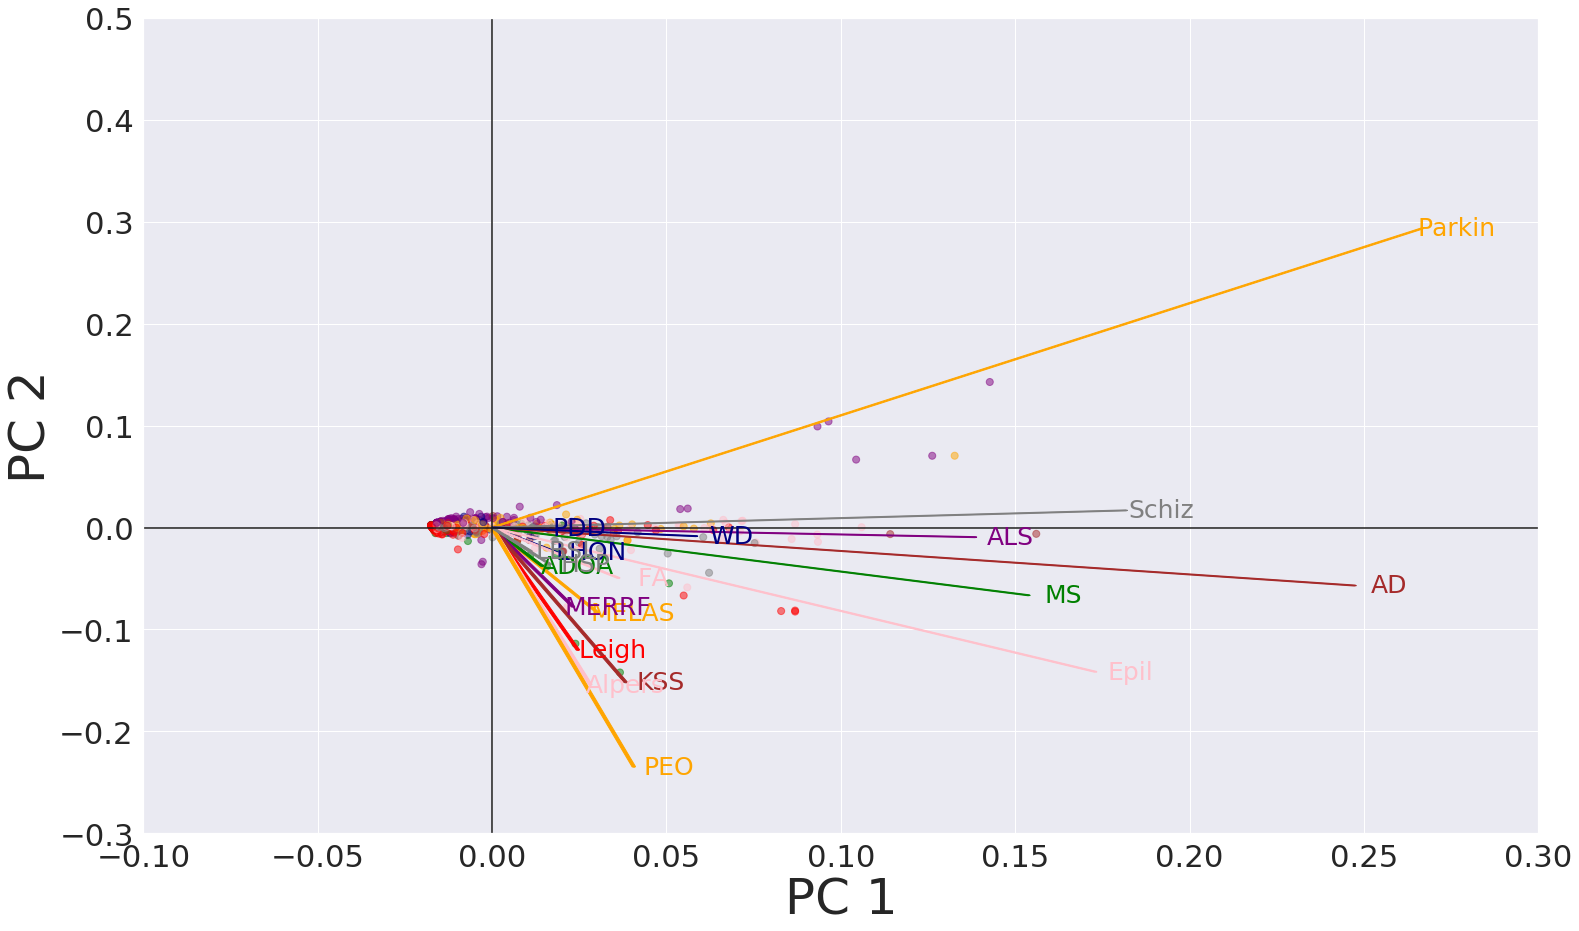

In [27]:
newdata = ndf.copy(deep =True)
# Create a biplot
biplot(newdata, reduced_data, pca,'Data/protein-both-biplot.pdf',clrs);
biplot(newdata, reduced_data, pca,'Data/protein-both-biplot.png',clrs);

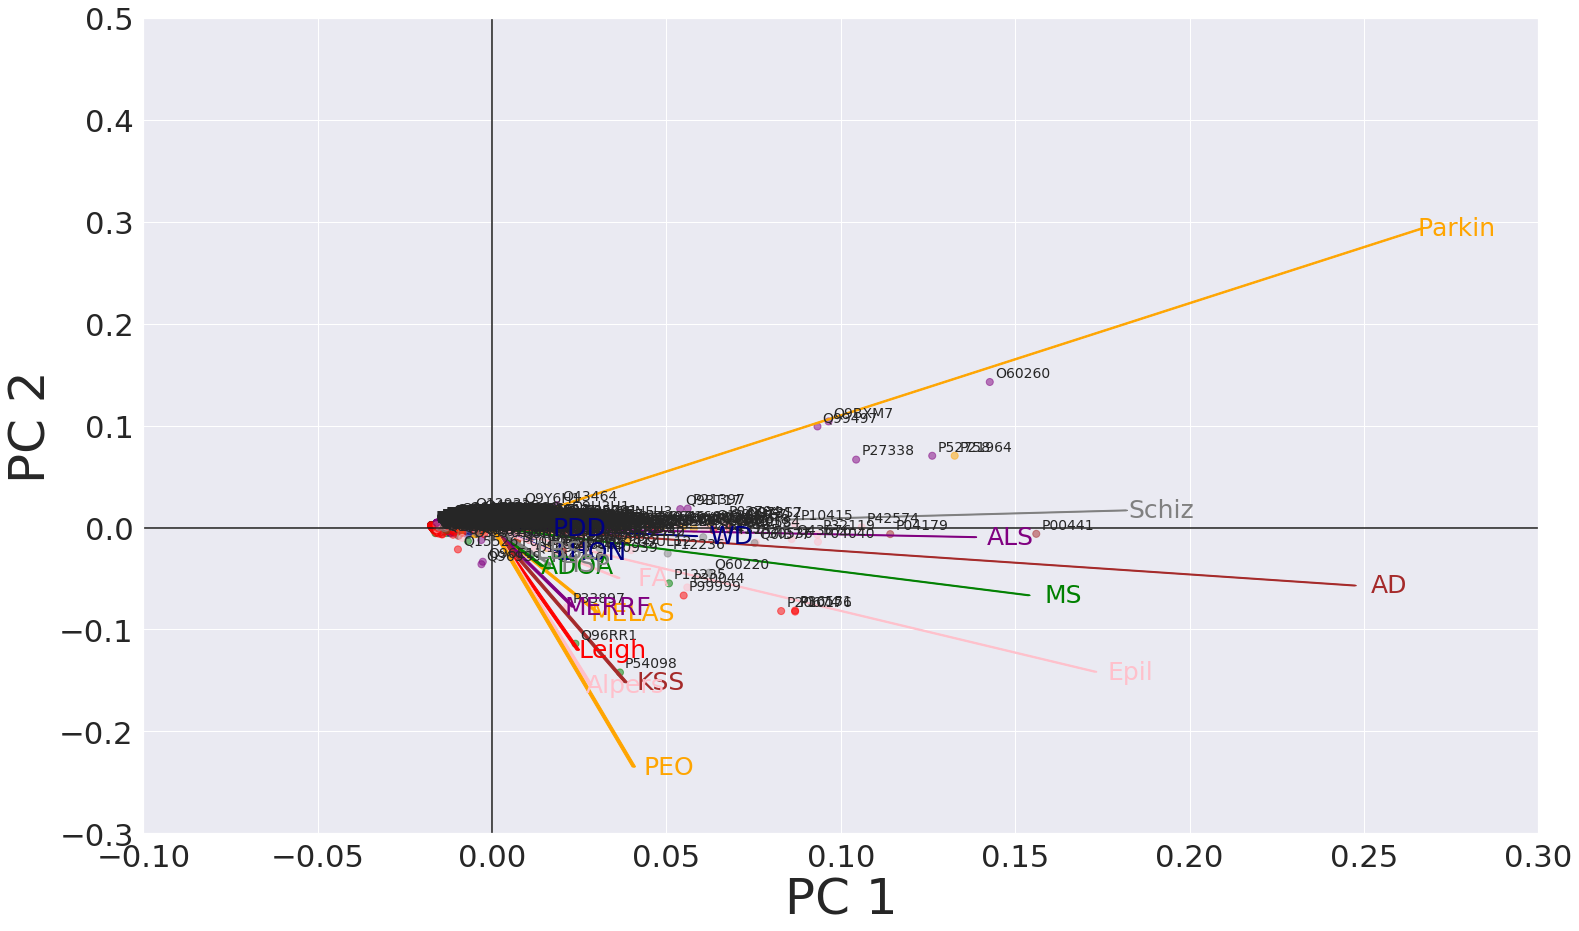

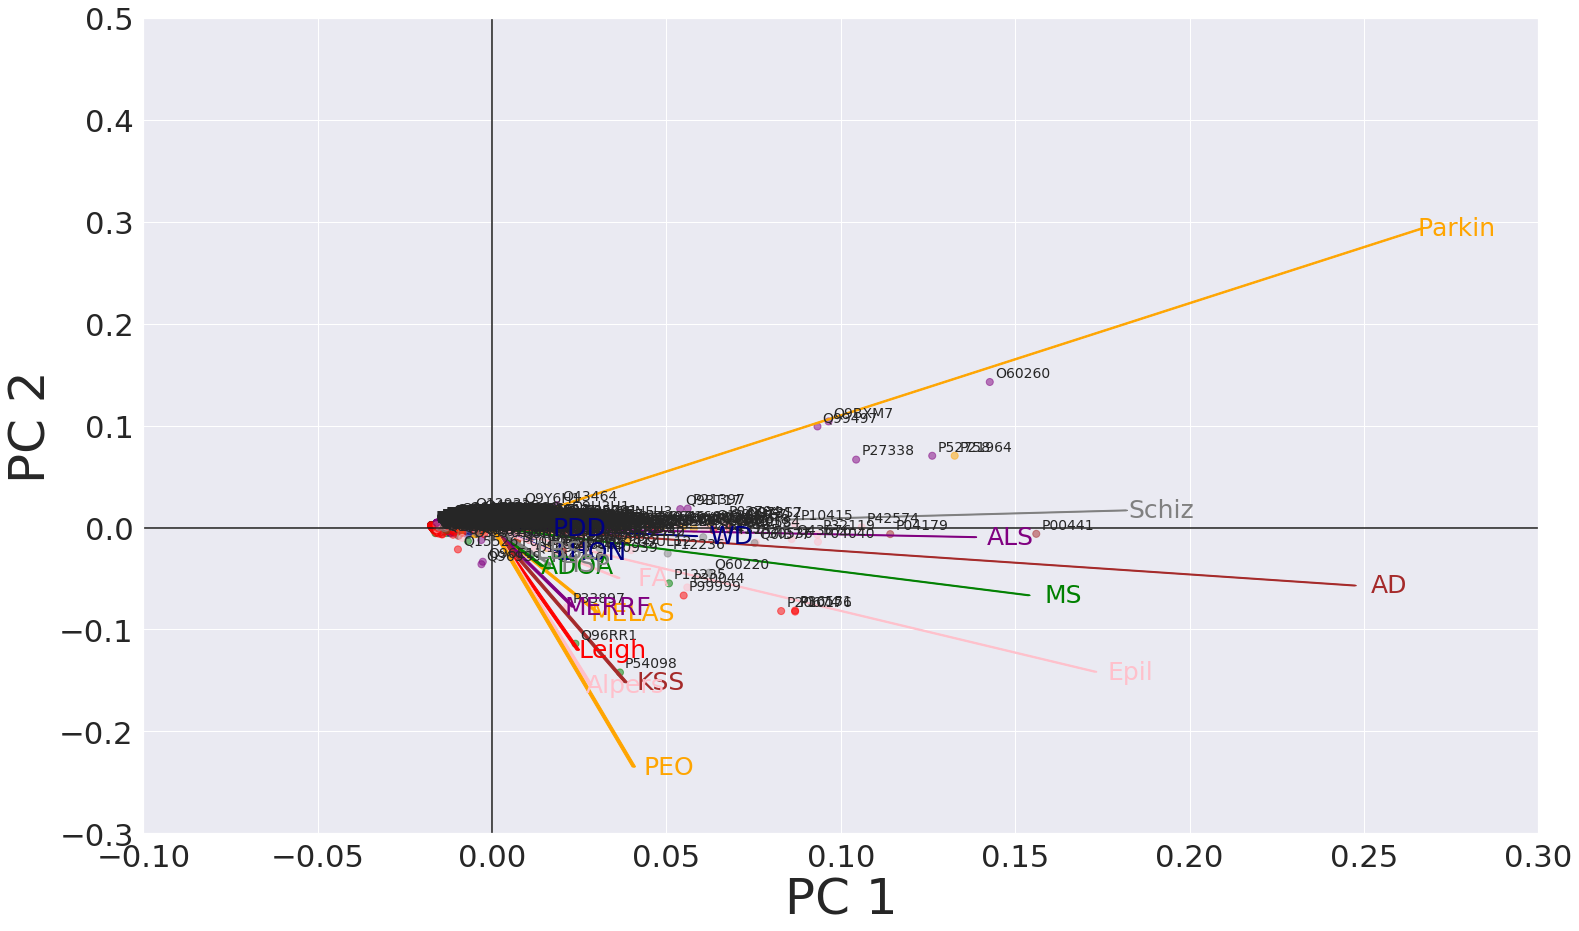

In [28]:
# Create a biplot
biplot_labeled_points(newdata, reduced_data, pca,'Data/protein-both-labeled-biplot.pdf',clrs);
biplot_labeled_points(newdata, reduced_data, pca,'Data/protein-both-labeled-biplot.png',clrs);

### K-Means

In [29]:
#https://www.askpython.com/python/examples/plot-k-means-clusters-python

In [30]:
fv = pca.components_.T
fv

array([[ 0.03679257, -0.04808412],
       [ 0.0608139 , -0.16750995],
       [ 0.02875532, -0.0754988 ],
       [ 0.04926235, -0.24032038],
       [ 0.04647968, -0.15553548],
       [ 0.07670048, -0.30390478],
       [ 0.05639052, -0.30845423],
       [ 0.02216432, -0.04636586],
       [ 0.02997555, -0.00206649],
       [ 0.08130642, -0.4695216 ],
       [ 0.30771516, -0.13294722],
       [ 0.53326234,  0.58680233],
       [ 0.27706582, -0.01886812],
       [ 0.49467725, -0.11383262],
       [ 0.34603909, -0.28308453],
       [ 0.36347669,  0.03360292],
       [ 0.07254543, -0.09903068],
       [ 0.03330945, -0.0720534 ],
       [ 0.11709606, -0.01690541]])

In [31]:

from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(fv)
 
print(label)

[1 1 1 1 1 1 1 1 1 1 0 2 0 0 0 0 1 1 1]


u_labels 3


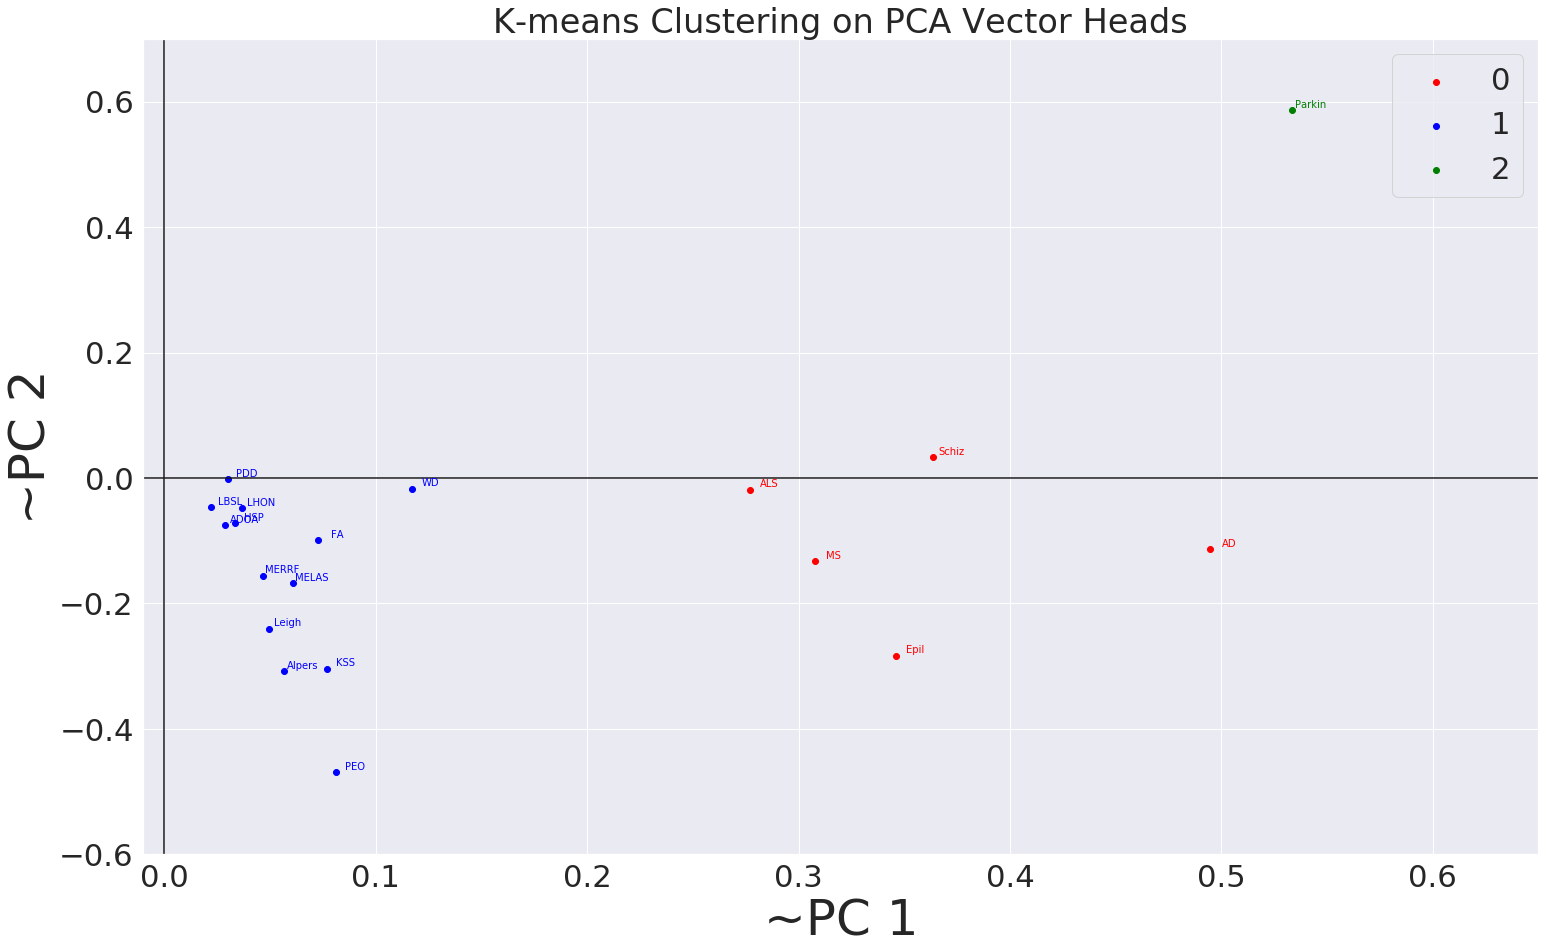

In [35]:
import matplotlib.pyplot as plt
clc  =['red', "blue", "green","black","orange","purple","pink"]

u_labels = np.unique(label)
print('u_labels', len(u_labels))
#plotting the results:
 
fig, ax = plt.subplots(figsize = (25,15))
asize, tpos = 0.5, 1.1

names = {}
for i, v in enumerate(fv):
    names[str(v)] = newdata.columns[i]

#plotting the results
for j in u_labels:
    plt.scatter(x = fv[label == j, 0], y = fv[label == j, 1], label = j, color= clc[j])
    for i, v in enumerate(fv[label == j]):
        ax.text(v[0]+0.009, v[1]+0.009, names[str(v)], color=clc[j], ha='center', va='center', fontsize=10)
        
ax.set_xlabel("~PC 1", fontsize=50)
ax.set_ylabel("~PC 2", fontsize=50)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.axis([-0.01, 0.65, -0.6, 0.7])
plt.title('K-means Clustering on PCA Vector Heads')
plt.legend()
plt.savefig('Data/K-Means-on-PCA-Vector-Heads.png')
plt.savefig('Data/K-Means-on-PCA-Vector-Heads.pdf')
plt.show()


In [33]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

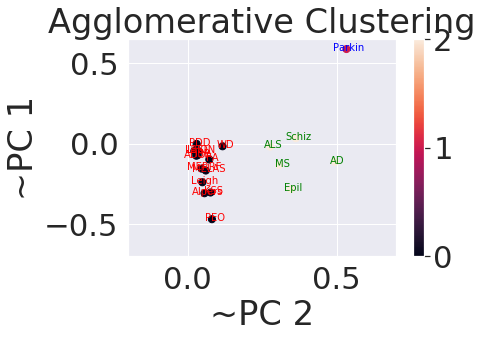

In [34]:
#https://www.dezyre.com/recipes/do-agglomerative-clustering-in-python
X = fv
data = pd.DataFrame(X)

cor = data.corr()
#sns.heatmap(cor, square = True); #plt.show()
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
clt = AgglomerativeClustering(linkage="complete", affinity="euclidean", \
                              n_clusters=3)
model = clt.fit(X_std)
clusters = pd.DataFrame(model.fit_predict(X_std))
data["Cluster"] = clusters
labels = list(data["Cluster"])
fig = plt.figure(); ax = fig.add_subplot(111)
scatter = ax.scatter(data[0],data[1], c=data["Cluster"],s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("~PC 2"); ax.set_ylabel("~PC 1")
plt.axis([-0.2, 0.7, -0.7, 0.65])
for i, v in enumerate(X):
    j = labels[i]
    ax.text(v[0]+0.009, v[1]+0.009, names[str(v)], color=clc[j], ha='center', va='center', fontsize=10)

plt.savefig('Data/Agglomerative-Clustering-on-PCA-Vector-Heads.png')
plt.savefig('Data/Agglomerative-Clustering-on-PCA-Vector-Heads.pdf')   
#plt.axis([-1,1,-1,1])
plt.colorbar(scatter); plt.show()
